In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

from celavi.simple_model import Context

np.random.seed(0)

## Lifespan functions

In [2]:
K = 1.1   # Weibull shape parameter
L = 20.0  # Weibull scale parameter

lifespan_fns = {
    "nacelle": lambda: 30,
    "blade": lambda: round(float(weibull_min.rvs(K, loc=0, scale=L, size=1))),  # EOLs on whole years
    "foundation": lambda: 50,
    "tower": lambda: 50,
}

## Components of all the turbines

In [3]:
number_of_turbines = 620

turbine = [
    {
        "kind": "blade",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": 2000,
    },
    {
        "kind": "blade",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": 2000,
    },
    {
        "kind": "blade",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": 2000,
    },
    {
        "kind": "nacelle",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": 2000,
    },
    {
        "kind": "tower",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": 2000,
    },
    {
        "kind": "foundation",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": 2000,
    },
]

components = pd.DataFrame(turbine * number_of_turbines)

## Plot this model's CDF

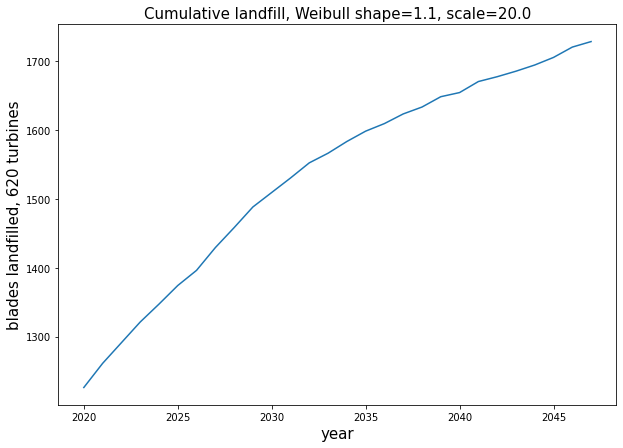

In [25]:
context = Context()
context.populate(components, lifespan_fns)
landfill_inventory = context.run()
ys = landfill_inventory.loc[160::4, "blade"]
xs = np.arange(len(ys)) + 2020
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
ax.plot(xs, ys)
ax.set_ylabel(f"blades landfilled, {number_of_turbines} turbines", fontsize=15)
ax.set_xlabel("year", fontsize=15)
ax.set_title(f"Cumulative landfill, Weibull shape={K}, scale={L}", fontsize=15)
plt.show()

In [26]:
len(ys)

28

## Plot the other model's CDF

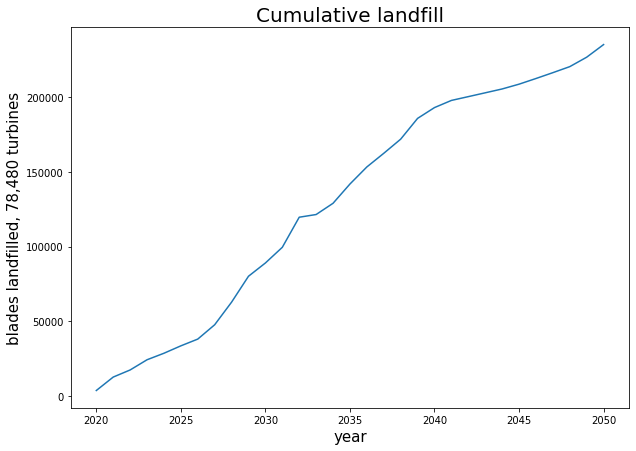

In [41]:
df = pd.read_csv("other_model_blades_retired_per_year.csv")
xs = df["Year"].values
ys = df["Blades.Retired.Per.Year"].values
ys = np.cumsum(ys)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
ax.plot(xs, ys)
ax.set_ylabel(f"blades landfilled, 78,480 turbines", fontsize=15)
ax.set_xlabel("year", fontsize=15)
ax.set_title(f"Cumulative landfill", fontsize=20)
plt.show()

2047.75


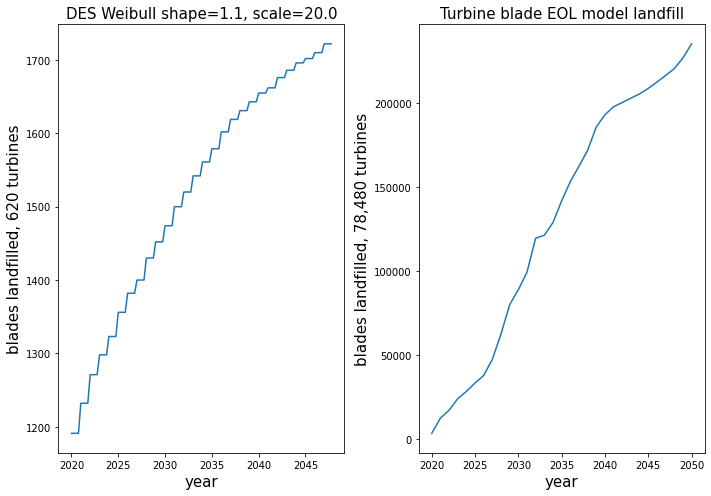

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

context = Context()
context.populate(components, lifespan_fns)
landfill_inventory = context.run()
ys = landfill_inventory.loc[160:, "blade"]
xs = np.arange(len(ys)) / 4 + 2020
ax[0].plot(xs, ys)
ax[0].set_ylabel(f"blades landfilled, {number_of_turbines} turbines", fontsize=15)
ax[0].set_xlabel("year", fontsize=15)
ax[0].set_title(f"DES Weibull shape={K}, scale={L}", fontsize=15)

df = pd.read_csv("other_model_blades_retired_per_year.csv")
xs = df["Year"].values
ys = df["Blades.Retired.Per.Year"].values
ys = np.cumsum(ys)
ax[1].plot(xs, ys)
ax[1].set_ylabel(f"blades landfilled, 78,480 turbines", fontsize=15)
ax[1].set_xlabel("year", fontsize=15)
ax[1].set_title(f"Turbine blade EOL model landfill", fontsize=15)

plt.tight_layout()
plt.show()